# Walmart Case Study

# 🛒 Walmart Business Case Study: Exploratory Data Analysis (EDA)

Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

---

📊 Dataset Overview

The dataset `walmart_data.csv` contains the following columns:

| Column Name              | Description                                      |
|--------------------------|--------------------------------------------------|
| `User_ID`                | Unique identifier for each customer              |
| `Product_ID`             | Unique identifier for each product               |
| `Gender`                 | Gender of the customer (`Male` / `Female`)       |
| `Age`                    | Age group in bins (e.g., `18-25`, `26-35`)       |
| `Occupation`             | Occupation code                                  |
| `City_Category`          | Category of city (`A`, `B`, `C`)                 |
| `StayInCurrentCityYears`| Years stayed in current city (`1`, `2`, `4+`)     |
| `Marital_Status`         | Marital status (`0` = Single, `1` = Married)     |
| `ProductCategory`        | Category of the product purchased                |
| `Purchase`               | Purchase amount in USD                           |



In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load & Inspect the Dataset

In [300]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 1.1 Shape of the dataset - Rows and Columns

In [284]:
df.shape

(550068, 10)

DataSet has 5Lakhs records

In [371]:
df['User_ID'].nunique()

5891

Out of 5Lakhs records, we have 5891 unique users 

In [372]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

* 4.1Lakhs Male customers  
* 1.3Lakhs of Female customers

In [373]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

* 4225 Unique Male Customers
* 1666 Unique Female customers

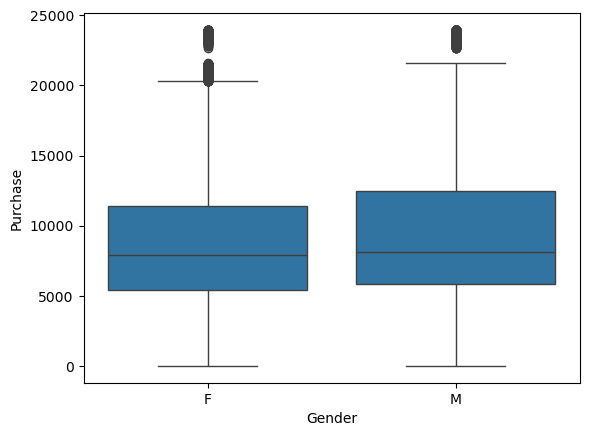

In [374]:
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.show()

We can't conclude males are spending more than females because of insignificant distance between median 

In [375]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


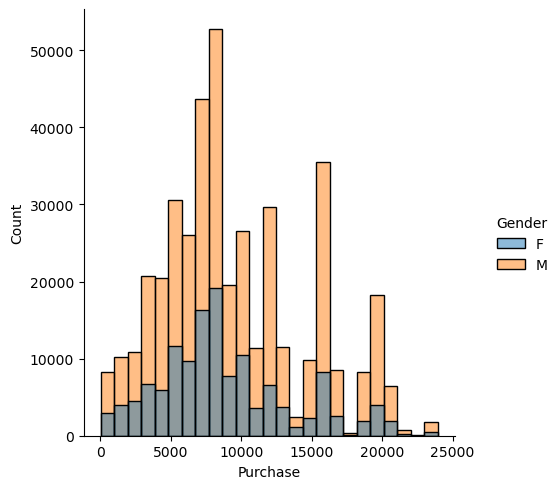

In [378]:
sns.displot(x='Purchase', hue='Gender', data=df, bins=25)
plt.show()

## 1.2 Data Type of all the columns in the dataset

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [286]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


## 1.3 Checking null values and finding number of missing values in each column

In [287]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No Null values availbale in the dataset

# Step 2: Data Cleaning

## 2.1 Checking the outliers for every continues variable

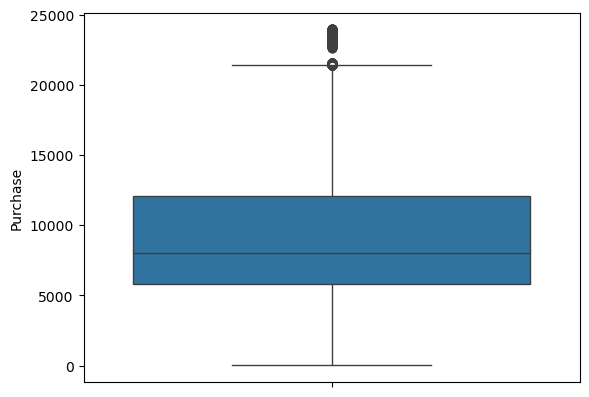

In [301]:
sns.boxplot(data=df['Purchase'])
plt.show()

In [302]:
p_25 = np.percentile(df['Purchase'], 25)
print(f"25th percentile or Q1: {p_25}")

p_50 = np.percentile(df['Purchase'], 50)
print(f"50th percentile or Q2: {p_50}")

p_75 = np.percentile(df['Purchase'], 75)
print(f"75th percentile or Q3: {p_75}")

25th percentile or Q1: 5823.0
50th percentile or Q2: 8047.0
75th percentile or Q3: 12054.0


In [303]:
iqr_Purchase = p_75 - p_25
print(f"IQR of Purchase is : {iqr_Purchase}")

IQR of Purchase is : 6231.0


In [304]:
upperlimit_Purchase = p_75 + 1.5*(iqr_Purchase)
lowerlimit_Purchase = p_25 - 1.5*(iqr_Purchase)

print(f"Upper Limit : {upperlimit_Purchase}")
print(f"Lower Limit : {lowerlimit_Purchase}")

Upper Limit : 21400.5
Lower Limit : -3523.5


In [305]:
outliers_Purchase = df[df['Purchase'] > upperlimit_Purchase]

print(f"Number of outliers in Purchase data: {len(outliers_Purchase)}")

Number of outliers in Purchase data: 2677


In [294]:
df.shape

(550068, 10)

## 2.2 Remove/Clip the outliers between 5th percentile and 95th percentile

In [306]:
lower = df['Purchase'].quantile(0.05)
upper = df['Purchase'].quantile(0.95)

print(lower, upper)

1984.0 19336.0


In [307]:
p5 = df["Purchase"].quantile(0.05)
p95 = df["Purchase"].quantile(0.95)

df["Purchase_clipped"] = df["Purchase"].clip(p5, p95)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_clipped
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969


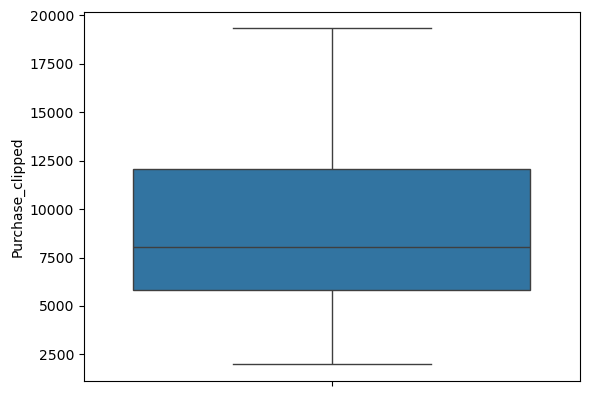

In [308]:
sns.boxplot(data=df['Purchase_clipped'])
plt.show()

In [309]:
df.shape

(550068, 11)

# Step 3: Univariate & Bivariate Analysis

## 3.1 What products are different age groups buying?

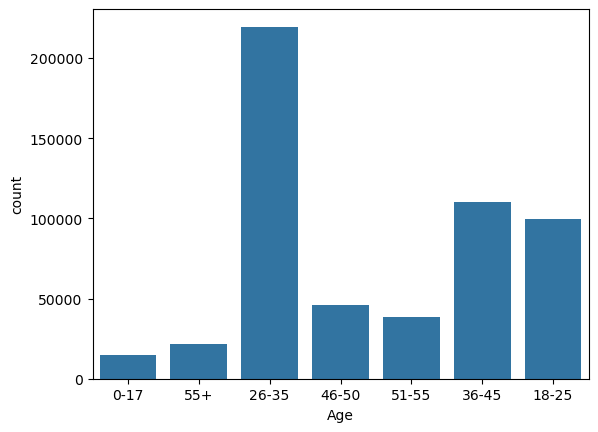

In [310]:
sns.countplot(data=df, x=df['Age'])
plt.show()

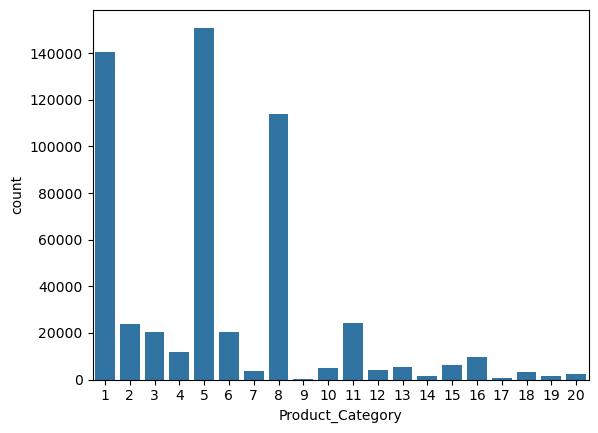

In [312]:
sns.countplot(data=df, x=df['Product_Category'])
plt.show()

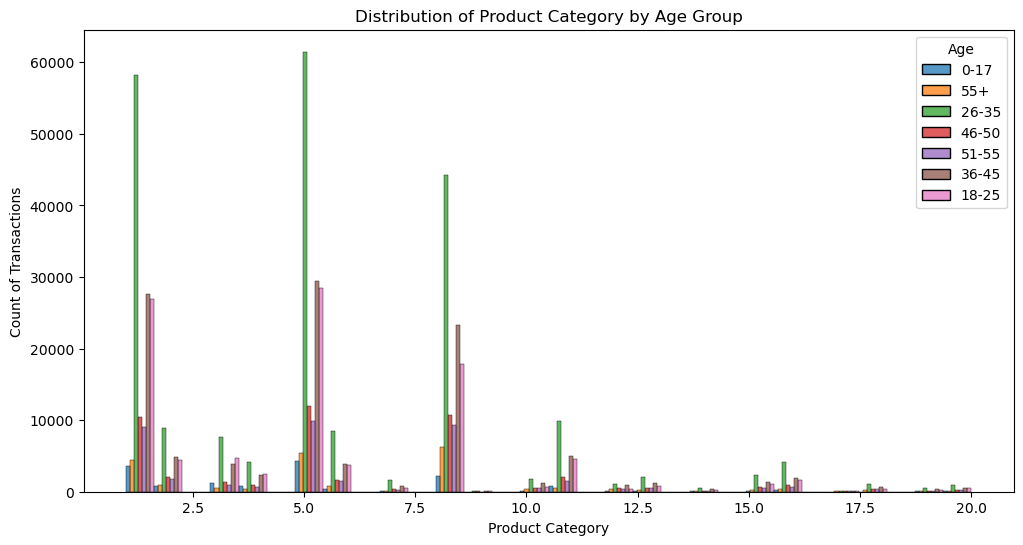

In [320]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Product_Category", hue="Age", multiple="dodge", bins=30)

plt.title("Distribution of Product Category by Age Group")
plt.xlabel("Product Category")
plt.ylabel("Count of Transactions")
plt.show()

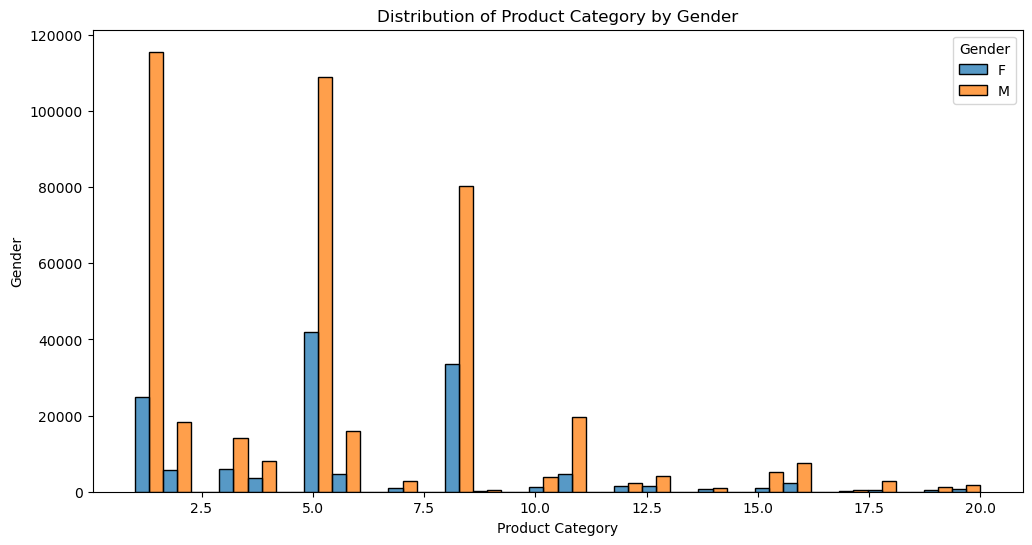

In [321]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Product_Category", hue="Gender", multiple="dodge", bins=30)

plt.title("Distribution of Product Category by Gender")
plt.xlabel("Product Category")
plt.ylabel("Gender")
plt.show()

,mean,median
Gender,,
F,5.717714,5.0
M,5.301512,5.0


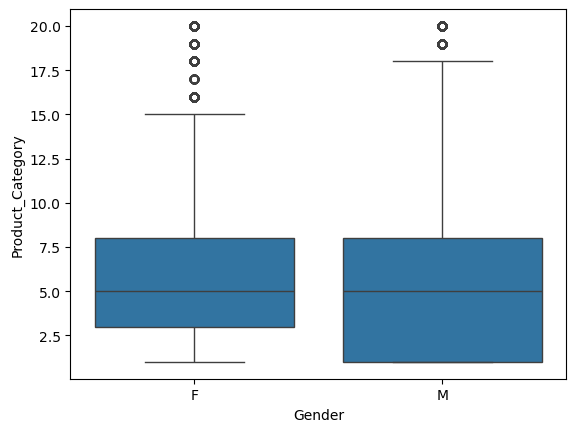

In [317]:
sns.boxplot(x='Gender', y='Product_Category', data=df)
df.groupby('Gender', observed=False)['Product_Category'].agg(['mean', 'median'])

,mean,median
Marital_Status,,
0,9258.820464,8044.0
1,9253.669823,8051.0


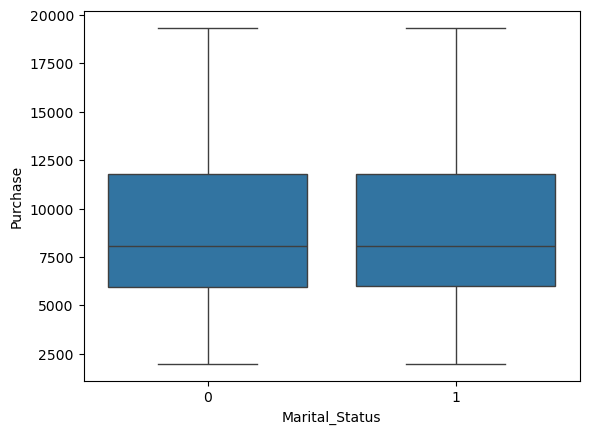

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
df.groupby('Marital_Status', observed=False)['Purchase'].agg(['mean', 'median'])

,mean,median
Age,,
0-17,8940.649053,7986.0
18-25,9169.010977,8027.0
26-35,9243.780119,8030.0
36-45,9322.921909,8061.0
46-50,9204.211483,8036.0
51-55,9514.863250,8130.0
55+,9327.796549,8105.5


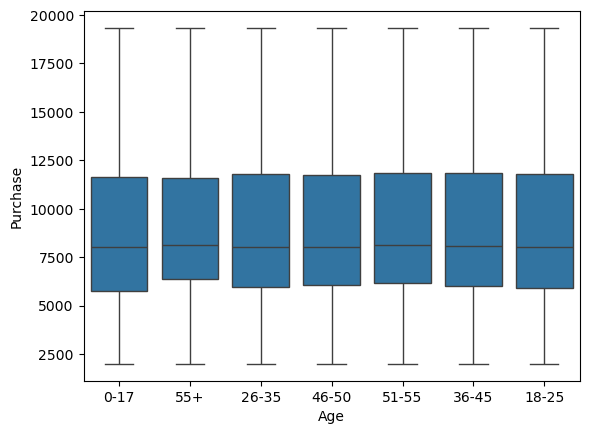

In [ ]:
sns.boxplot(x='Age', y='Purchase', data=df)
df.groupby('Age', observed=False)['Purchase'].agg(['mean', 'median'])

# Step 4: Gender affect the amount spent?

In [273]:
import scipy.stats as stats

In [363]:
def clt_ci_with_means(data, label, sample_size=300, n_samples=1000, confidence=0.95):
    sample_means = [data.sample(n=sample_size, replace=True).mean() for _ in range(n_samples)]
    mean = np.mean(sample_means)
    std_err = np.std(sample_means)
    ci = stats.norm.interval(confidence, loc=mean, scale=std_err)
    
    return pd.DataFrame({'Group': label, 'SampleMean': sample_means}), ci

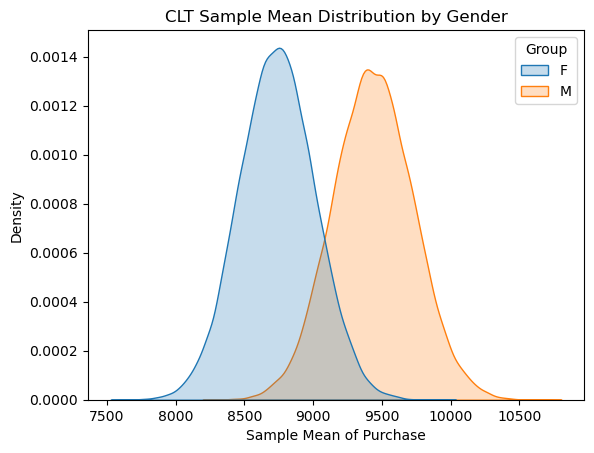

Female 95% CI: (8197.110756270866, 9274.400354262469)
Male 95% CI: (8861.291408143195, 10010.90506359014)


In [370]:
female_df, female_ci = clt_ci_with_means(df[df['Gender']=='F']['Purchase'], 'F', sample_size=300, n_samples=50000)
male_df, male_ci = clt_ci_with_means(df[df['Gender']=='M']['Purchase'], 'M', sample_size=300, n_samples=50000)

combined_df = pd.concat([female_df, male_df])

sns.kdeplot(data=combined_df, x='SampleMean', hue='Group', fill=True, common_norm=False)
plt.title('CLT Sample Mean Distribution by Gender')
plt.xlabel('Sample Mean of Purchase')
plt.ylabel('Density')
plt.show()

print(f"Female 95% CI: {female_ci}")
print(f"Male 95% CI: {male_ci}")

In [361]:
def clt_ci(data, sample_size=300, n_samples=1000, confidence=0.95):
    sample_means = [data.sample(n=sample_size, replace=True).mean() for _ in range(n_samples)]
    mean = np.mean(sample_means)
    std_err = np.std(sample_means)

    sns.kdeplot(data=sample_means)

    return stats.norm.interval(confidence, loc=mean, scale=std_err)


Female confidence interval for 300 gender and purchanse samples is : (8197.455850737784, 9274.06736699555)
Male confidence interval for 300 gender and purchanse samples is : (8861.276526866202, 10011.50055046713)


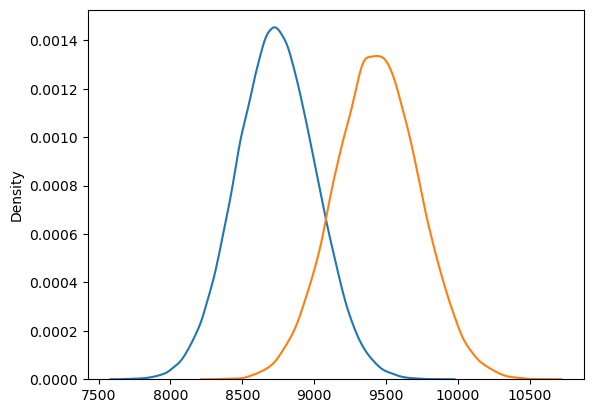

In [362]:
female_ci = clt_ci(df[df['Gender']=='F']['Purchase'], sample_size=300, n_samples=50000)
male_ci = clt_ci(df[df['Gender']=='M']['Purchase'], sample_size=300, n_samples=50000)

print(f"Female confidence interval for 300 gender and purchanse samples is : {female_ci}")
print(f"Male confidence interval for 300 gender and purchanse samples is : {male_ci}")

Female confidence interval for 3000 gender and purchanse samples is : (8563.913488524771, 8904.836872661896)
Male confidence interval for 3000 gender and purchanse samples is : (9253.640432417042, 9621.475557076292)


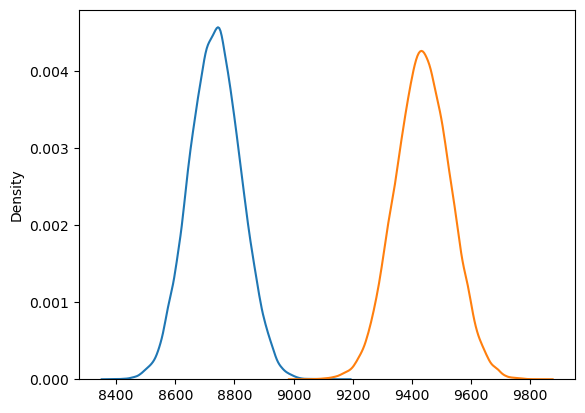

In [343]:
female_ci = clt_ci(df[df['Gender']=='F']['Purchase'], sample_size=3000, n_samples=50000)
male_ci = clt_ci(df[df['Gender']=='M']['Purchase'], sample_size=3000, n_samples=50000)

print(f"Female confidence interval for 3000 gender and purchanse samples is : {female_ci}")
print(f"Male confidence interval for 3000 gender and purchanse samples is : {male_ci}")

Female confidence interval for 30000 gender and purchanse samples is : (8681.00348108982, 8788.465628831515)
Male confidence interval for 30000 gender and purchanse samples is : (9380.110174288317, 9495.010850347679)


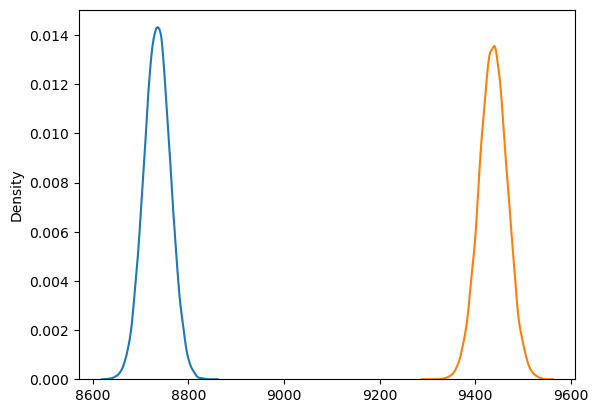

In [344]:
female_ci = clt_ci(df[df['Gender']=='F']['Purchase'], sample_size=30000, n_samples=50000)
male_ci = clt_ci(df[df['Gender']=='M']['Purchase'], sample_size=30000, n_samples=50000)

print(f"Female confidence interval for 30000 gender and purchanse samples is : {female_ci}")
print(f"Male confidence interval for 30000 gender and purchanse samples is : {male_ci}")

# Step 5. Marital_Status affect the amount spent?

UnMarried confidence interval for 300 Marital_Status and Purchase samples is : (8696.032164803586, 9834.733964663083)
Married confidence interval for 300 Marital_Status and Purchase samples is : (8695.946606865538, 9825.37580620113)


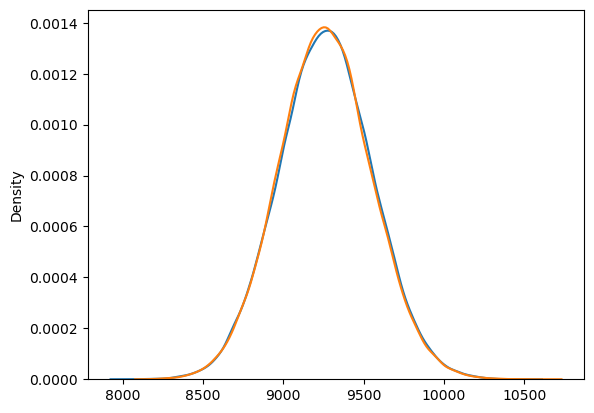

In [345]:
unmarried_ci = clt_ci(df[df['Marital_Status']==0]['Purchase'], sample_size=300, n_samples=50000)
married_ci = clt_ci(df[df['Marital_Status']==1]['Purchase'], sample_size=300, n_samples=50000)

print(f"UnMarried confidence interval for 300 Marital_Status and Purchase samples is : {unmarried_ci}")
print(f"Married confidence interval for 300 Marital_Status and Purchase samples is : {married_ci}")

UnMarried confidence interval for 300 Marital_Status and Purchase samples is : (9087.039638962067, 9445.618766771264)
Married confidence interval for 300 Marital_Status and Purchase samples is : (9081.070347513685, 9441.443925766313)


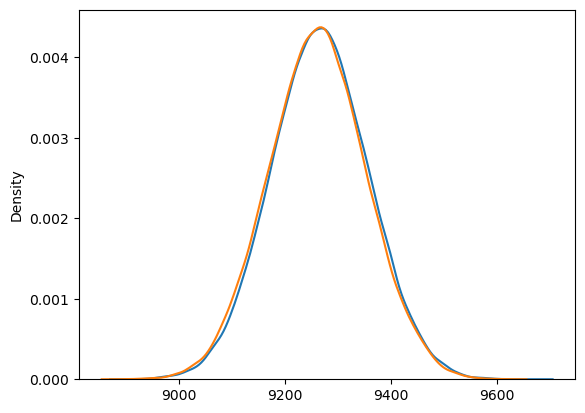

In [346]:
unmarried_ci = clt_ci(df[df['Marital_Status']==0]['Purchase'], sample_size=3000, n_samples=50000)
married_ci = clt_ci(df[df['Marital_Status']==1]['Purchase'], sample_size=3000, n_samples=50000)

print(f"UnMarried confidence interval for 300 Marital_Status and Purchase samples is : {unmarried_ci}")
print(f"Married confidence interval for 300 Marital_Status and Purchase samples is : {married_ci}")

UnMarried confidence interval for 300 Marital_Status and Purchase samples is : (9209.208694747924, 9322.485447576075)
Married confidence interval for 300 Marital_Status and Purchase samples is : (9204.201218520238, 9317.416021539762)


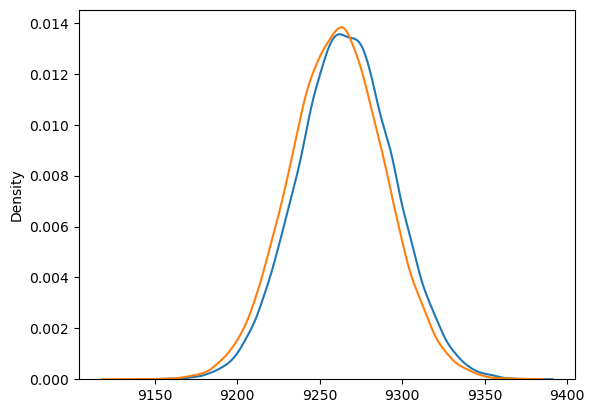

In [347]:
unmarried_ci = clt_ci(df[df['Marital_Status']==0]['Purchase'], sample_size=30000, n_samples=50000)
married_ci = clt_ci(df[df['Marital_Status']==1]['Purchase'], sample_size=30000, n_samples=50000)

print(f"UnMarried confidence interval for 300 Marital_Status and Purchase samples is : {unmarried_ci}")
print(f"Married confidence interval for 300 Marital_Status and Purchase samples is : {married_ci}")

# Step 6. Age affect the amount spent?

first_age_ci confidence interval for 300 Age and Purchase samples is : (8354.98475922229, 9509.677735311045)
second_age_ci confidence interval for 300 Age and Purchase samples is : (8769.679591046026, 9902.007977353971)
third_age_ci confidence interval for 300 Age and Purchase samples is : (8683.635906179788, 9819.83714542021)
fourth_age_ci confidence interval for 300 Age and Purchase samples is : (8646.411881527223, 9772.168472472775)
fifth_age_ci confidence interval for 300 Age and Purchase samples is : (8958.833425302513, 10108.604811097488)
sixth_age_ci confidence interval for 300 Age and Purchase samples is : (8763.159105933293, 9900.297281800038)
seventh_age_ci confidence interval for 300 Age and Purchase samples is : (8598.438881624508, 9738.872652775492)


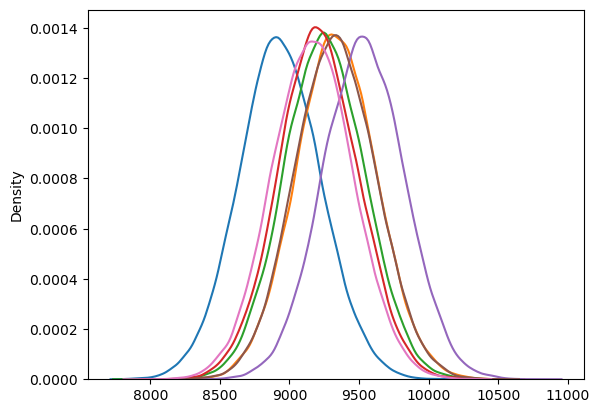

In [350]:
first_age_ci = clt_ci(df[df['Age']=='0-17']['Purchase'], sample_size=300, n_samples=50000)
second_age_ci = clt_ci(df[df['Age']=='55+']['Purchase'], sample_size=300, n_samples=50000)
third_age_ci = clt_ci(df[df['Age']=='26-35']['Purchase'], sample_size=300, n_samples=50000)
fourth_age_ci = clt_ci(df[df['Age']=='46-50']['Purchase'], sample_size=300, n_samples=50000)
fifth_age_ci = clt_ci(df[df['Age']=='51-55']['Purchase'], sample_size=300, n_samples=50000)
sixth_age_ci = clt_ci(df[df['Age']=='36-45']['Purchase'], sample_size=300, n_samples=50000)
seventh_age_ci = clt_ci(df[df['Age']=='18-25']['Purchase'], sample_size=300, n_samples=50000)

print(f"first_age_ci confidence interval for 300 Age and Purchase samples is : {first_age_ci}")
print(f"second_age_ci confidence interval for 300 Age and Purchase samples is : {second_age_ci}")
print(f"third_age_ci confidence interval for 300 Age and Purchase samples is : {third_age_ci}")
print(f"fourth_age_ci confidence interval for 300 Age and Purchase samples is : {fourth_age_ci}")
print(f"fifth_age_ci confidence interval for 300 Age and Purchase samples is : {fifth_age_ci}")
print(f"sixth_age_ci confidence interval for 300 Age and Purchase samples is : {sixth_age_ci}")
print(f"seventh_age_ci confidence interval for 300 Age and Purchase samples is : {seventh_age_ci}")